Reproduce Fig2: Pearson based and STTC based area ACFs and timescales.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
from calculate_tau import fit_single_exp, func_single_exp_monkey
from cfg_global import project_folder_path
os.chdir(current_wd)

In [2]:
empty_suffix = 'with'

In [3]:
results_folder = project_folder_path + 'results\\monkey\\'
fig_folder = results_folder + '\\fig_drafts_paper\\'
results_folder_current = project_folder_path + 'results\\monkey\\fixation_period_1000ms_' + empty_suffix + '_empty\\'

### Get the data

In [17]:
# pfdl_dataset_constraints_df = pd.read_pickle(results_folder + 'pfdl_dataset_constraints_1000ms_' + empty_suffix + '_empty_df.pkl')
# pfp_dataset_constraints_df = pd.read_pickle(results_folder + 'pfp_dataset_constraints_1000ms_' + empty_suffix + '_empty_df.pkl')

# # get subsets based on constraints 
# pfdl_dataset_constraints_subset_df = pfdl_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()
# pfp_dataset_constraints_subset_df = pfp_dataset_constraints_df.query('n_trials_more_20 == True and no_zero_bins == 1 and one_hz_activity == 1').copy()

temp_folder = project_folder_path + 'results\\monkey\\lab_meeting_snapshot\\fixation_period_1000ms\\'
pfdl_dataset_constraints_subset_df = pd.read_pickle(temp_folder + 'binned\\pfdl\\acf\\z\\' + 'acf_average_trial_pearsonr_constrained_input_50ms_20lags_df.pkl')
pfp_dataset_constraints_subset_df = pd.read_pickle(temp_folder + 'binned\\pfp\\acf\\z\\' + 'acf_average_trial_pearsonr_constrained_input_50ms_20lags_df.pkl')

pfdl_dataset_constraints_subset_df = pfdl_dataset_constraints_subset_df[['unit_id']].copy()
pfp_dataset_constraints_subset_df = pfp_dataset_constraints_subset_df[['unit_id']].copy()

In [18]:
### pearsonr trial avg
pfdl_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder_current + 'binned\\pfdl\\acf\\' 
                                                    + 'acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_acf_average_trial_pearsonr_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_pearsonr_df = pd.read_pickle(results_folder_current + 'binned\\pfp\\acf\\' 
                                                   + 'acf_pearsonr_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_acf_average_trial_pearsonr_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_pearsonr_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_pearsonr_subset_df.reset_index(inplace=True, drop=True)

### sttc trial avg
pfdl_acf_average_trial_sttc_df = pd.read_pickle(results_folder_current + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_acf_average_trial_sttc_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfdl_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

pfp_acf_average_trial_sttc_df = pd.read_pickle(results_folder_current + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_sttc_trial_avg_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_acf_average_trial_sttc_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_acf_average_trial_sttc_df, 
                                                                              on='unit_id', how='left')
pfp_acf_average_trial_sttc_subset_df.reset_index(inplace=True, drop=True)

### sttc trial concat
pfdl_sttc_trial_concat_df = pd.read_pickle(results_folder_current + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_sttc_trial_concat_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_sttc_trial_concat_df, 
                                                                              on='unit_id', how='left')
pfdl_sttc_trial_concat_subset_df.reset_index(inplace=True, drop=True)

pfp_sttc_trial_concat_df = pd.read_pickle(results_folder_current + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_sttc_trial_concat_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_sttc_trial_concat_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_sttc_trial_concat_df, 
                                                                              on='unit_id', how='left')
pfp_sttc_trial_concat_subset_df.reset_index(inplace=True, drop=True)

### sttc trial concat global norm
pfdl_sttc_trial_concat_global_df = pd.read_pickle(results_folder_current + 'non_binned\\pfdl\\acf\\' 
                                                + 'acf_sttc_trial_concat_global_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfdl_sttc_trial_concat_global_subset_df = pfdl_dataset_constraints_subset_df.merge(pfdl_sttc_trial_concat_global_df, 
                                                                              on='unit_id', how='left')
pfdl_sttc_trial_concat_global_subset_df.reset_index(inplace=True, drop=True)

pfp_sttc_trial_concat_global_df = pd.read_pickle(results_folder_current + 'non_binned\\pfp\\acf\\' 
                                               + 'acf_sttc_trial_concat_global_1000ms_' + empty_suffix + '_empty_50ms_20lags_df.pkl')
pfp_sttc_trial_concat_global_subset_df = pfp_dataset_constraints_subset_df.merge(pfp_sttc_trial_concat_global_df, 
                                                                              on='unit_id', how='left')
pfp_sttc_trial_concat_global_subset_df.reset_index(inplace=True, drop=True)

# check NaNs and number of units

print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_pearsonr_subset_df), 
                                                          len(pfp_acf_average_trial_pearsonr_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_acf_average_trial_sttc_subset_df), 
                                                          len(pfp_acf_average_trial_sttc_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_sttc_trial_concat_subset_df), 
                                                          len(pfp_sttc_trial_concat_subset_df)))
print('N neurons in PFdl {} \nN neurons in PFp {}'.format(len(pfdl_sttc_trial_concat_global_subset_df), 
                                                          len(pfp_sttc_trial_concat_global_subset_df)))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_pearsonr_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfdl_sttc_trial_concat_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfdl_sttc_trial_concat_global_subset_df.isnull().any().any()))

print('NaNs in PFdl acf {}'.format(pfdl_acf_average_trial_sttc_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_acf_average_trial_sttc_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_sttc_trial_concat_subset_df.isnull().any().any()))
print('NaNs in PFp acf {}'.format(pfp_sttc_trial_concat_global_subset_df.isnull().any().any()))

N neurons in PFdl 367 
N neurons in PFp 318
N neurons in PFdl 367 
N neurons in PFp 318
N neurons in PFdl 367 
N neurons in PFp 318
N neurons in PFdl 367 
N neurons in PFp 318
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFp acf False
NaNs in PFp acf False
NaNs in PFdl acf False
NaNs in PFp acf False
NaNs in PFp acf False
NaNs in PFp acf False


In [19]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]

pfdl_acf_2d = pfdl_acf_average_trial_pearsonr_subset_df[acf_cols].values
pfp_acf_2d = pfp_acf_average_trial_pearsonr_subset_df[acf_cols].values

pfdl_acf_mean = np.nanmean(pfdl_acf_2d, axis=0)
pfdl_acf_sem = stats.sem(pfdl_acf_2d, axis=0)
pfp_acf_mean = np.nanmean(pfp_acf_2d, axis=0)
pfp_acf_sem = stats.sem(pfp_acf_2d, axis=0)

pfdl_acf_sttc_2d = pfdl_acf_average_trial_sttc_subset_df[acf_cols].values
pfp_acf_sttc_2d = pfp_acf_average_trial_sttc_subset_df[acf_cols].values

pfdl_acf_sttc_mean = np.nanmean(pfdl_acf_sttc_2d, axis=0)
pfdl_acf_sttc_sem = stats.sem(pfdl_acf_sttc_2d, axis=0)
pfp_acf_sttc_mean = np.nanmean(pfp_acf_sttc_2d, axis=0)
pfp_acf_sttc_sem = stats.sem(pfp_acf_sttc_2d, axis=0)

pfdl_acf_sttc_concat_2d = pfdl_sttc_trial_concat_subset_df[acf_cols].values
pfp_acf_sttc_concat_2d = pfp_sttc_trial_concat_subset_df[acf_cols].values

pfdl_acf_sttc_concat_mean = np.nanmean(pfdl_acf_sttc_concat_2d, axis=0)
pfdl_acf_sttc_concat_sem = stats.sem(pfdl_acf_sttc_concat_2d, axis=0)
pfp_acf_sttc_concat_mean = np.nanmean(pfp_acf_sttc_concat_2d, axis=0)
pfp_acf_sttc_concat_sem = stats.sem(pfp_acf_sttc_concat_2d, axis=0)

pfdl_acf_sttc_concat_global_2d = pfdl_sttc_trial_concat_global_subset_df[acf_cols].values
pfdl_acf_sttc_concat_global_mean = np.nanmean(pfdl_acf_sttc_concat_global_2d, axis=0)
pfdl_acf_sttc_concat_global_sem = stats.sem(pfdl_acf_sttc_concat_global_2d, axis=0)

pfp_acf_sttc_concat_global_2d = pfp_sttc_trial_concat_global_subset_df[acf_cols].values
pfp_acf_sttc_concat_global_mean = np.nanmean(pfp_acf_sttc_concat_global_2d, axis=0)
pfp_acf_sttc_concat_global_sem = stats.sem(pfp_acf_sttc_concat_global_2d, axis=0)

### Calculate tau

In [20]:
def get_population_tau(acf_mean_, start_idx_, exp_fun_):
    fit_popt, fit_pcov, tau, fit_r_squared, log_message = fit_single_exp(acf_mean_, start_idx_=start_idx_, exp_fun_=exp_fun_)
    
    # get confidence interval
    b_std_err = np.sqrt(fit_pcov[1, 1])  # Standard error of b
    tau_std_err = b_std_err / (fit_popt[1] ** 2)
    
    confidence_level = 0.95
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # 1.96 for 95% 
    
    tau_lower = tau - z_score * tau_std_err
    tau_upper = tau + z_score * tau_std_err

    print(f'tau {tau}, 95% CI {tau_lower},{tau_upper}, r_squared {fit_r_squared}, log message {log_message}')
    
    return tau, tau_lower, tau_upper, fit_r_squared, fit_popt

In [21]:
population_level_dict = {}

In [22]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfdl_acf_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['pearsonr_trial_avg_pfdl'] = {'tau_ms':tau*50,
                                                    'tau_lower_ms':tau_lower*50, 
                                                    'tau_upper_ms':tau_upper*50, 
                                                    'fit_r_squared': fit_r_squared, 
                                                    'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfp_acf_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['pearsonr_trial_avg_pfp'] = {'tau_ms':tau*50,
                                                    'tau_lower_ms':tau_lower*50, 
                                                    'tau_upper_ms':tau_upper*50, 
                                                    'fit_r_squared': fit_r_squared, 
                                                    'popt': popt}

tau 4.726540639920867, 95% CI 4.4096920643265385,5.043389215515196, r_squared 0.9976443520820709, log message ok
tau 236.32703199604336, 95% CI 220.48460321632692,252.1694607757598
tau 4.63739516176123, 95% CI 4.183583404150611,5.0912069193718485, r_squared 0.9948933032033292, log message ok
tau 231.8697580880615, 95% CI 209.17917020753057,254.56034596859243


In [23]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfdl_acf_sttc_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_avg_pfdl'] = {'tau_ms':tau*50,
                                                'tau_lower_ms':tau_lower*50, 
                                                'tau_upper_ms':tau_upper*50, 
                                                'fit_r_squared': fit_r_squared, 
                                                'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfp_acf_sttc_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_avg_pfp'] = {'tau_ms':tau*50,
                                               'tau_lower_ms':tau_lower*50, 
                                               'tau_upper_ms':tau_upper*50, 
                                               'fit_r_squared': fit_r_squared, 
                                               'popt': popt}

tau 4.557141773850683, 95% CI 4.210648539264535,4.90363500843683, r_squared 0.9968555164172985, log message ok
tau 227.85708869253415, 95% CI 210.53242696322675,245.1817504218415
tau 4.612786221423549, 95% CI 4.064100105271886,5.161472337575211, r_squared 0.9924322764373879, log message ok
tau 230.63931107117745, 95% CI 203.2050052635943,258.07361687876056


In [24]:
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfdl_acf_sttc_concat_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_concat_pfdl'] = {'tau_ms':tau*50,
                                                   'tau_lower_ms':tau_lower*50, 
                                                   'tau_upper_ms':tau_upper*50, 
                                                   'fit_r_squared': fit_r_squared,
                                                   'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfp_acf_sttc_concat_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_concat_pfp'] = {'tau_ms':tau*50,
                                                  'tau_lower_ms':tau_lower*50, 
                                                  'tau_upper_ms':tau_upper*50, 
                                                  'fit_r_squared': fit_r_squared, 
                                                  'popt': popt}

tau 4.831551176661891, 95% CI 4.340398845289263,5.322703508034518, r_squared 0.9947245487176436, log message ok
tau 241.57755883309454, 95% CI 217.01994226446314,266.1351754017259
tau 5.668964132969424, 95% CI 4.775915328405778,6.56201293753307, r_squared 0.989560180180517, log message ok
tau 283.44820664847117, 95% CI 238.79576642028889,328.1006468766535


In [25]:
### THIS MAKES NO SENSE! - will not use it!
tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfdl_acf_sttc_concat_global_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_concat_global_pfdl'] = {'tau_ms':tau*50,
                                                          'tau_lower_ms':tau_lower*50, 
                                                          'tau_upper_ms':tau_upper*50, 
                                                          'fit_r_squared': fit_r_squared, 
                                                          'popt': popt}

tau, tau_lower, tau_upper, fit_r_squared, popt = get_population_tau(pfp_acf_sttc_concat_global_mean, 2, func_single_exp_monkey)
print(f'tau {tau*50}, 95% CI {tau_lower*50},{tau_upper*50}')
population_level_dict['sttc_trial_concat_global_pfp'] = {'tau_ms':tau*50,
                                                         'tau_lower_ms':tau_lower*50, 
                                                         'tau_upper_ms':tau_upper*50, 
                                                         'fit_r_squared': fit_r_squared, 
                                                         'popt': popt}

tau 23.95932135088047, 95% CI -12.18562890611187,60.1042716078728, r_squared 0.9256174719850303, log message ok
tau 1197.9660675440234, 95% CI -609.2814453055935,3005.2135803936403
tau 204.61681243129712, 95% CI -2676.3776244182563,3085.6112492808506, r_squared 0.9102744291951568, log message ok
tau 10230.840621564856, 95% CI -133818.88122091282,154280.56246404254


In [ ]:
population_level_dict

### Plot

In [14]:
save_fig = True

#### Fig 2 style

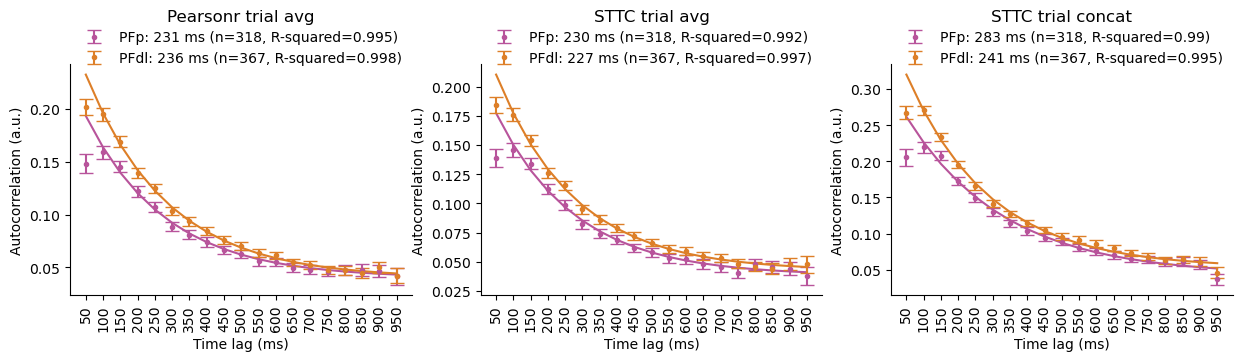

In [26]:
fig, axes = plt.subplots(1,3, figsize=(15,3), sharey=False)

t = np.linspace(1, n_lags-1, n_lags-1).astype(int)
t_labels = np.linspace(50, 950, n_lags-1).astype(int)

# Pearsonr trial avg 
axes[0].set_title('Pearsonr trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['pearsonr_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfp']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfp_acf_mean[1:], pfp_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['pearsonr_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_pearsonr_subset_df)}, R-squared={np.round(population_level_dict['pearsonr_trial_avg_pfdl']['fit_r_squared'], 3)})"
axes[0].errorbar(t, pfdl_acf_mean[1:], pfdl_acf_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[0].plot(t, func_single_exp_monkey(t, *population_level_dict['pearsonr_trial_avg_pfdl']['popt']), color='#dd7f28')


# STTC trial avg 
axes[1].set_title('STTC trial avg', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['sttc_trial_avg_pfp']['tau_ms'])} ms (n={len(
    pfp_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfp']['fit_r_squared'], 3)})"

axes[1].errorbar(t, pfp_acf_sttc_mean[1:], pfp_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['sttc_trial_avg_pfdl']['tau_ms'])} ms (n={len(
    pfdl_acf_average_trial_sttc_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_avg_pfdl']['fit_r_squared'], 3)})"

axes[1].errorbar(t, pfdl_acf_sttc_mean[1:], pfdl_acf_sttc_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[1].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_avg_pfdl']['popt']), color='#dd7f28')

# STTC trial concat 
axes[2].set_title('STTC trial concat', y=1.15)

pfp_label = f"PFp: {int(population_level_dict['sttc_trial_concat_pfp']['tau_ms'])} ms (n={len(
    pfp_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfp']['fit_r_squared'], 3)})"
axes[2].errorbar(t, pfp_acf_sttc_concat_mean[1:], pfp_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#b8549b', label=pfp_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfp']['popt']), color='#b8549b')

pfdl_label = f"PFdl: {int(population_level_dict['sttc_trial_concat_pfdl']['tau_ms'])} ms (n={len(
    pfdl_sttc_trial_concat_subset_df)}, R-squared={np.round(population_level_dict['sttc_trial_concat_pfdl']['fit_r_squared'], 3)})"
axes[2].errorbar(t, pfdl_acf_sttc_concat_mean[1:], pfdl_acf_sttc_concat_sem[1:], linestyle='None', marker='.', capsize=5, color='#dd7f28', label=pfdl_label)
axes[2].plot(t, func_single_exp_monkey(t, *population_level_dict['sttc_trial_concat_pfdl']['popt']), color='#dd7f28')

for ax in axes.flat:
    ax.set_xticks(t)
    ax.set_xticklabels(t_labels, rotation=90)
    ax.set_xlabel('Time lag (ms)')
    ax.set_ylabel('Autocorrelation (a.u.)')  
    
    ax.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.2))

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.png', bbox_inches='tight')
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_constraints_closer_paper.svg', bbox_inches='tight')

#### todo plot with 2 subplots (per brain area)

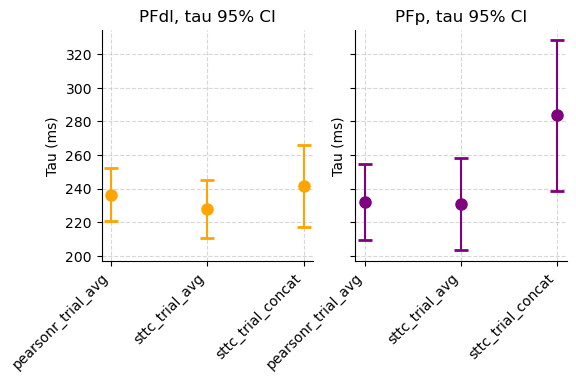

In [27]:
pfdl_conditions = [key for key in population_level_dict.keys() if 'pfdl' in key and 'global' not in key]
pfp_conditions = [key for key in population_level_dict.keys() if 'pfp' in key and 'global' not in key]

pfdl_tau = [population_level_dict[c]['tau_ms'] for c in pfdl_conditions]
pfdl_tau_lower = [population_level_dict[c]['tau_lower_ms'] for c in pfdl_conditions]
pfdl_tau_upper = [population_level_dict[c]['tau_upper_ms'] for c in pfdl_conditions]
pfdl_error_bars = [np.array(pfdl_tau) - np.array(pfdl_tau_lower), np.array(pfdl_tau_upper) - np.array(pfdl_tau)]

pfp_tau = [population_level_dict[c]['tau_ms'] for c in pfp_conditions]
pfp_tau_lower = [population_level_dict[c]['tau_lower_ms'] for c in pfp_conditions]
pfp_tau_upper = [population_level_dict[c]['tau_upper_ms'] for c in pfp_conditions]
pfp_error_bars = [np.array(pfp_tau) - np.array(pfp_tau_lower), np.array(pfp_tau_upper) - np.array(pfp_tau)]

fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

axes[0].errorbar(pfdl_conditions, pfdl_tau, yerr=pfdl_error_bars, fmt='o', capsize=5, capthick=2, markersize=8, 
                 color='orange')
axes[0].set_xticks(pfdl_conditions)
axes[0].set_title('PFdl, tau 95% CI')

axes[1].errorbar(pfp_conditions, pfp_tau, yerr=pfp_error_bars, fmt='o', capsize=5, capthick=2, markersize=8, 
                 color='purple')
axes[1].set_xticks(pfp_conditions)
axes[1].set_title('PFp, tau 95% CI')

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_ylabel('Tau (ms)')
    ax.set_xticklabels(['pearsonr_trial_avg', 'sttc_trial_avg', 'sttc_trial_concat'], rotation=45, ha='right', fontsize=10)

sns.despine()

if save_fig:
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_tau_ci_constraints_closer_paper.png', bbox_inches='tight')
    fig.savefig(fig_folder + 'fig2_repr_3_methods_with_empty_1000_tau_ci_constraints_closer_paper.svg', bbox_inches='tight')